In [1]:
import tensorflow as tf

In [2]:
cd C:\Users\LENOVO\Desktop\HCU\summer_4_1\image processing

C:\Users\LENOVO\Desktop\HCU\summer_4_1\image processing


In [3]:
import numpy as np
import os

wd = os.getcwd()
path = os.path.join(wd, "train_val")
files = os.listdir(path)
size = len(files)
print("Total sample size is", size)

Total sample size is 4800


In [4]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
from tqdm import tqdm 

images = []
ages = []
genders = []
# file -> [age] [gender] [race] [date&time].jpg
n = 0
for file in tqdm(files):
  try:
    age = int(file.split('_')[0]) # string to int
    gender = int(file.split('_')[1]) # string to int
    img = imread(path+'/'+file)

    ages.append(age)
    genders.append(gender)
    images.append(img)
  except Exception as ex:
    continue

100%|██████████| 4800/4800 [00:02<00:00, 1987.31it/s]


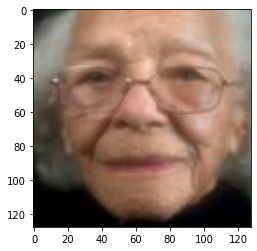

Gender: Female Age: 100 image_size = (128, 128, 3)


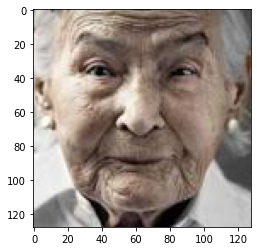

Gender: Female Age: 100 image_size = (128, 128, 3)


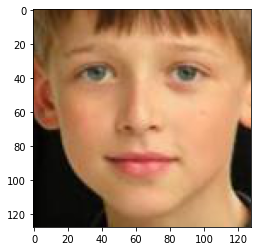

Gender: Male Age: 10 image_size = (128, 128, 3)


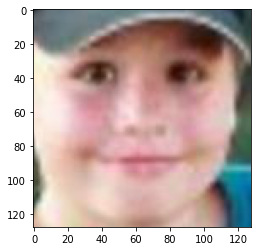

Gender: Male Age: 10 image_size = (128, 128, 3)


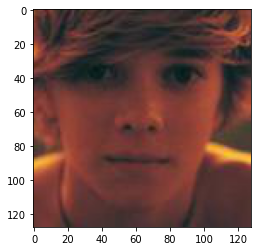

Gender: Male Age: 10 image_size = (128, 128, 3)


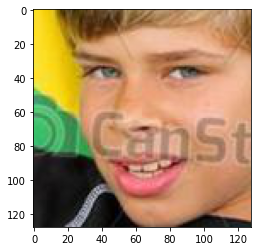

Gender: Male Age: 10 image_size = (128, 128, 3)


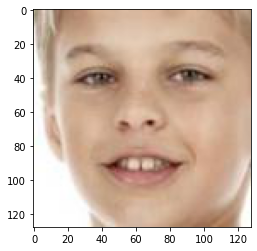

Gender: Male Age: 10 image_size = (128, 128, 3)


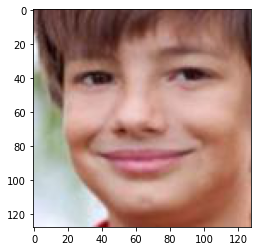

Gender: Male Age: 10 image_size = (128, 128, 3)


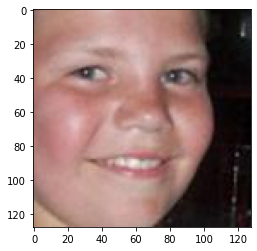

Gender: Male Age: 10 image_size = (128, 128, 3)


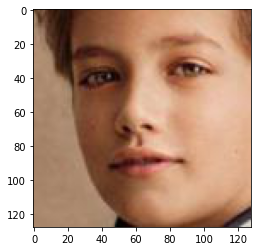

Gender: Male Age: 10 image_size = (128, 128, 3)


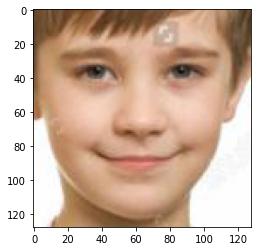

Gender: Male Age: 10 image_size = (128, 128, 3)


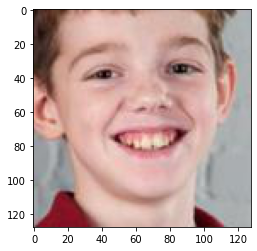

Gender: Male Age: 10 image_size = (128, 128, 3)


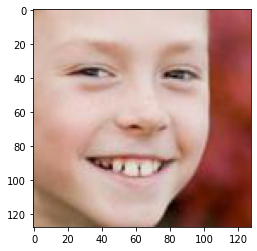

Gender: Male Age: 10 image_size = (128, 128, 3)


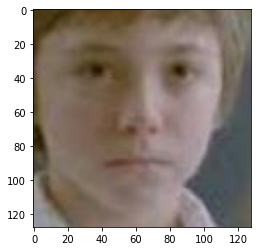

Gender: Male Age: 10 image_size = (128, 128, 3)


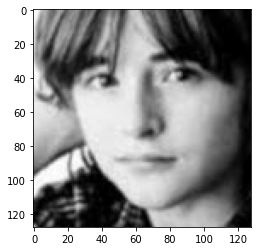

Gender: Male Age: 10 image_size = (128, 128, 3)


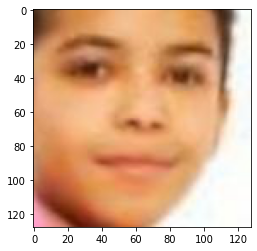

Gender: Male Age: 10 image_size = (128, 128, 3)


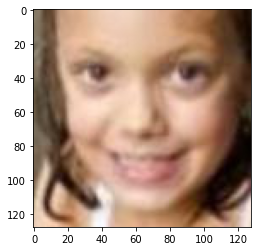

Gender: Female Age: 10 image_size = (128, 128, 3)


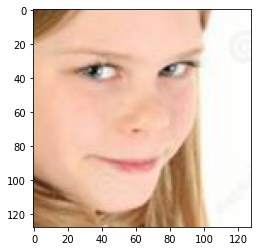

Gender: Female Age: 10 image_size = (128, 128, 3)


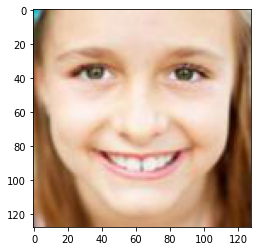

Gender: Female Age: 10 image_size = (128, 128, 3)


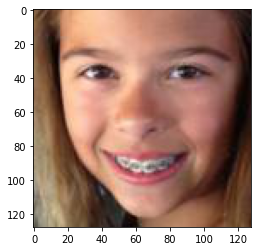

Gender: Female Age: 10 image_size = (128, 128, 3)


In [5]:
def check_gender(gender):
    if gender == 0:
      return "Male"
    else:
      return "Female"

i = 0
for i in range(20):
  image = images[i]
  plt.imshow(image)
  plt.show()
  print("Gender:",check_gender(genders[i]),"Age:",ages[i],"image_size =",image.shape)
  i += 1

In [6]:
# 80:20 for train:valid dataset
img_features = np.array(images)
img_features = img_features / 255 # normalize images

n_train = int(len(img_features) * 0.80)

X_train, y_train = img_features[:n_train], [np.array(ages[:n_train]), np.array(genders[:n_train])]
x_valid, y_valid = img_features[n_train:], [np.array(ages[n_train:]), np.array(genders[n_train:])]

In [7]:
# 80:20 for train:valid dataset
img_features = np.array(images)
img_features = img_features / 255 # normalize images

n_train = int(len(img_features) * 0.80)

X_train, y_train = img_features[:n_train], [np.array(ages[:n_train]), np.array(genders[:n_train])]
x_valid, y_valid = img_features[n_train:], [np.array(ages[n_train:]), np.array(genders[n_train:])]

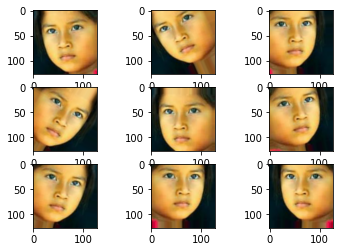

In [8]:
from numpy import expand_dims
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

def plot_augmentation(img_features):
    data = img_features
    # expand dimension to one sample
    samples = expand_dims(data, 0)
    # create image data augmentation generator
    image_gen = ImageDataGenerator(
            width_shift_range=.10,
            height_shift_range=.10,
            rotation_range=30,
            horizontal_flip=True,
            fill_mode='nearest')
    # prepare iterator
    it = image_gen.flow(samples, batch_size=1)
    # generate samples and plot
    for i in range(9):
        plt.subplot(330 + 1 + i)
        # generate batch of images
        batch = it.next()
        # convert to unsigned integers for viewing
        image = batch[0].astype('uint8')
        plt.imshow(image)
    # show the figure
    plt.show()


plot_augmentation(images[26])

In [9]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

batch_size = 64
def generator(X, y_train, batch_size):
    generator = ImageDataGenerator(
            width_shift_range=.10,
            height_shift_range=.10,
            rotation_range=30,
            horizontal_flip=True,
            fill_mode='nearest')

    genX1 = generator.flow(X, y_train[0], batch_size=batch_size, seed = 1)
    genX2 = generator.flow(X, y_train[1], batch_size=batch_size, seed = 1)

    while True:
        X1 = genX1.next()
        X2 = genX2.next()
        yield X1[0], (X1[1], X2[1])

# create generator
gen_flow = generator(X_train, y_train, batch_size = 64)

In [10]:
# from keras.models import Model
# from keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization, LeakyReLU
# import tensorflow as tf

# # Define the input layer
# input_layer = Input(shape=(128, 128, 3))

# # For CNN: use a simple CNN architecture with enhancements
# x = Conv2D(32, (3, 3))(input_layer)
# x = BatchNormalization()(x)
# x = LeakyReLU()(x)
# x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.25)(x)

# x = Conv2D(64, (3, 3))(x)
# x = BatchNormalization()(x)
# x = LeakyReLU()(x)
# x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.25)(x)

# x = Conv2D(128, (3, 3))(x)
# x = BatchNormalization()(x)
# x = LeakyReLU()(x)
# x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.25)(x)

# x = Conv2D(256, (3, 3))(x)
# x = BatchNormalization()(x)
# x = LeakyReLU()(x)
# x = Flatten()(x)
# x = Dense(256, activation='relu')(x)
# x = Dropout(0.5)(x)

# # Define the age branch
# age_branch = Dense(128, activation='relu')(x)
# age_output = Dense(1, activation='relu', name='age_output')(age_branch)

# # Define the gender branch
# gender_branch = Dense(128, activation='relu')(x)
# gender_output = Dense(1, activation='sigmoid', name='gender_output')(gender_branch)

# # Define the model
# modelA = Model(inputs=input_layer, outputs=[age_output, gender_output])

# # Compile the model
# modelA.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
#                loss={'age_output': 'mean_squared_error', 'gender_output': 'binary_crossentropy'},
#                metrics={'age_output': 'mae', 'gender_output': 'accuracy'})

# modelA.summary()

# from tensorflow.keras.utils import plot_model
# plot_model(modelA, show_shapes=True)


In [11]:
# from tensorflow.keras.optimizers import Adam
# from keras.callbacks import LearningRateScheduler, EarlyStopping

# batch_size = 128
# init_lr = 1e-2
# epochs = 300

# # Define learning rate scheduler function
# def lr_scheduler(epoch, lr):
#     decay_rate = 0.1
#     decay_step = 10
#     if epoch % decay_step == 0 and epoch:
#         return lr * decay_rate
#     return lr

# opt = Adam()
# modelA.compile(optimizer=opt,
#                loss={
#                    'age_output': 'mean_absolute_error',
#                    'gender_output': 'binary_crossentropy'},
#                metrics={
#                    'age_output': 'MAE',
#                    'gender_output': 'accuracy'})

# early_stop = EarlyStopping(monitor='val_loss', patience=20, verbose=1)
# lr_schedule = LearningRateScheduler(lr_scheduler, verbose=1)

# history = modelA.fit(gen_flow,
#                      validation_data=(x_valid, (y_valid[0], y_valid[1])),
#                      batch_size=batch_size,
#                      steps_per_epoch=X_train.shape[0] // batch_size,
#                      epochs=epochs,
#                      verbose=1,
#                      shuffle=True,
#                      workers=1,
#                      use_multiprocessing=False,  # Set to False
#                      validation_batch_size=batch_size,
#                      validation_freq=1,
#                      callbacks=[early_stop, lr_schedule])

# # Save the model
# # modelA.save("age_gender_A.h5")


In [14]:
from keras.models import Model
from keras.layers import Input,Dense, Flatten, Conv2D, MaxPooling2D, Dropout, Concatenate, GlobalAveragePooling2D


from tensorflow.keras.applications import MobileNetV2

model = MobileNetV2(include_top=False, input_shape=(128, 128, 3), weights='imagenet')
x = Flatten()(model.output)

# Define the age branch
age_branch = Dense(128, activation='relu')(x)
age_output = Dense(1, activation='relu', name='age_output')(age_branch)

# Define the gender branch
gender_branch = Dense(128, activation='relu')(x)
gender_output = Dense(1, activation='sigmoid', name='gender_output')(gender_branch)


modelB = Model(inputs= model.input,
                     outputs = [age_output, gender_output])

modelB.summary()
from tensorflow.keras.utils import plot_model
plot_model(modelB, show_shapes=True)

9420800/9406464 [==============================] - 2s 0us/step
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 64, 64, 32)   864         input_2[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 64, 64, 32)   128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 64, 64, 32)   0           bn_Conv1[0][0]                   
_____________________________

In [212]:
from tensorflow.keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler, EarlyStopping

batch_size = 64
init_lr = 1e-2
epochs = 300

# Define learning rate scheduler function
def lr_scheduler(epoch, lr):
    decay_rate = 0.1
    decay_step = 10
    if epoch % decay_step == 0 and epoch:
        return lr * decay_rate
    return lr

opt = Adam()
modelB.compile(optimizer=opt,
               loss={
                   'age_output': 'mean_absolute_error',
                   'gender_output': 'binary_crossentropy'},
               metrics={
                   'age_output': 'MAE',
                   'gender_output': 'accuracy'})

early_stop = EarlyStopping(monitor='val_loss', patience=20, verbose=1)
lr_schedule = LearningRateScheduler(lr_scheduler, verbose=1)

history = modelB.fit(gen_flow,
                     validation_data=(x_valid, (y_valid[0], y_valid[1])),
                     batch_size=batch_size,
                     steps_per_epoch=X_train.shape[0] // batch_size,
                     epochs=epochs,
                     verbose=1,
                     shuffle=True,
                     workers=1,
                     use_multiprocessing=False,  # Set to False
                     validation_batch_size=batch_size,
                     validation_freq=1,
                     callbacks=[early_stop, lr_schedule])

#Save the model
modelB.save("age_gender_A.h5")


Epoch 1/300

Epoch 00001: LearningRateScheduler setting learning rate to 0.0010000000474974513.


Exception in thread Thread-548:
Traceback (most recent call last):
  File "c:\Users\LENOVO\anaconda3\envs\tfpt\lib\threading.py", line 916, in _bootstrap_inner
    self.run()
  File "c:\Users\LENOVO\anaconda3\envs\tfpt\lib\threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "c:\Users\LENOVO\anaconda3\envs\tfpt\lib\site-packages\keras\utils\data_utils.py", line 868, in _run
    with closing(self.executor_fn(_SHARED_SEQUENCES)) as executor:
  File "c:\Users\LENOVO\anaconda3\envs\tfpt\lib\site-packages\keras\utils\data_utils.py", line 860, in pool_fn
    initargs=(seqs, self.random_seed, get_worker_id_queue()))
  File "c:\Users\LENOVO\anaconda3\envs\tfpt\lib\multiprocessing\context.py", line 119, in Pool
    context=self.get_context())
  File "c:\Users\LENOVO\anaconda3\envs\tfpt\lib\multiprocessing\pool.py", line 174, in __init__
    self._repopulate_pool()
  File "c:\Users\LENOVO\anaconda3\envs\tfpt\lib\multiprocessing\pool.py", line 239, in _repopulate_p

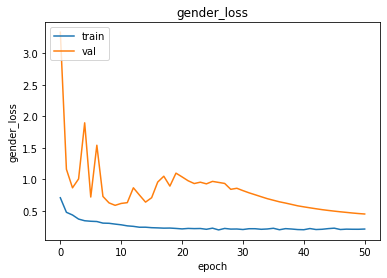

In [20]:
plt.plot(history.history['gender_output_loss'])
plt.plot(history.history['val_gender_output_loss'])
plt.title('gender_loss')
plt.ylabel('gender_loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

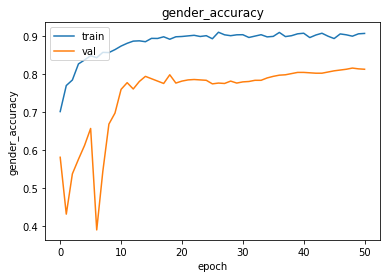

In [21]:
plt.plot(history.history['gender_output_accuracy'])
plt.plot(history.history['val_gender_output_accuracy'])
plt.title('gender_accuracy')
plt.ylabel('gender_accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

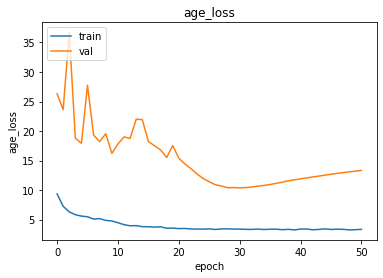

In [22]:
plt.plot(history.history['age_output_loss'])
plt.plot(history.history['val_age_output_loss'])
plt.title('age_loss')
plt.ylabel('age_loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

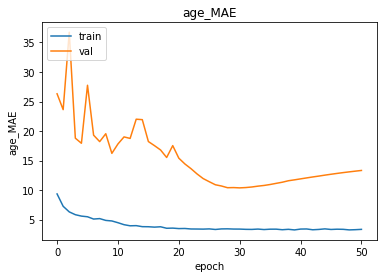

In [23]:
plt.plot(history.history['age_output_MAE'])
plt.plot(history.history['val_age_output_MAE'])
plt.title('age_MAE')
plt.ylabel('age_MAE')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [18]:
from tensorflow.keras.models import load_model

model = load_model('age_gender_A.h5')

In [114]:
from PIL import Image
import numpy as np
import os 
path = "img/"

def get_image(PATHS):
    IMG = []
    for p in os.listdir(path):
        try:
            img = Image.open(os.path.join(path, p))
            img = img.convert('RGB')
            img = img.resize((128, 128))
            img = np.array(img) / 255.0
            IMG.append(img)
        except Exception as e:
            print(f"Error loading image: {path}. Error: {e}")
            continue  # Skip to the next image
    return np.array(IMG)

imgs = get_image(path)


In [115]:
age, gender = model.predict(imgs)

gender = ["male" if g[0] < 0.5 else "female" for g in gender]
gender

['female', 'female', 'male', 'male', 'male', 'female', 'male', 'male']

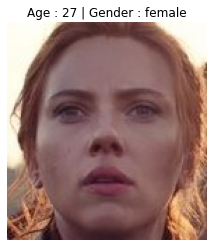

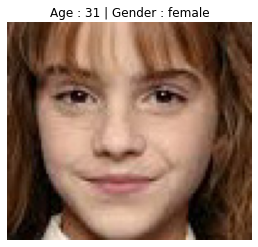

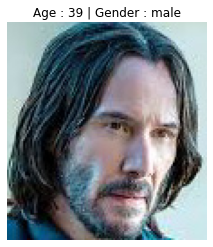

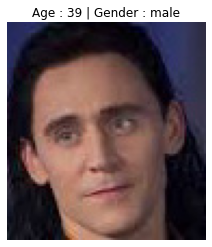

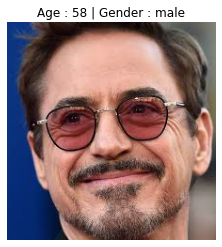

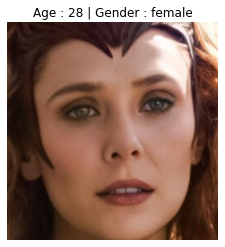

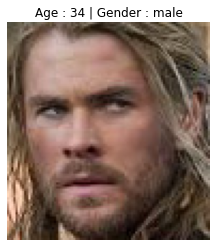

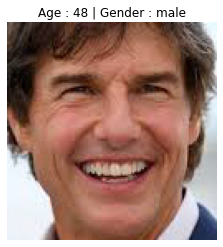

In [118]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt 

path = "img/"

def show_result(PATHS):
    for idx, p in enumerate(os.listdir(path)):
        try:
            img = Image.open(os.path.join(path, p))
            title = f"Age : {age[idx][0]:.0f} | Gender : {gender[idx]}"
            plt.title(title)
            plt.imshow(img)
            plt.axis('off')
            plt.show()
        except IOError:
            print(f"Error loading image: {path}")
            continue  


show_result(path)

# Testing the Model with test set

In [120]:
import numpy as np
import os

wd = os.getcwd()
path = os.path.join(wd, "test")
files = os.listdir(path)
size = len(files)
print("Total test size is", size)

Total test size is 200


In [165]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

images = []
ages = []
genders = []
# file -> [age] [gender] [race] [date&time].jpg
n = 0
for file in files:
  try:
    age = int(file.split('_')[0]) # string to int
    gender = int(file.split('_')[1]) # string to int
    img = imread(path+'/'+file)

    ages.append(age)
    genders.append(gender)
    images.append(img)
  except Exception as ex:
    continue

ages = np.array(ages, dtype=np.int32)
genders = np.array(genders, dtype=np.int32)

In [186]:
image = np.array(images)/255.

age_pred, gender_pred = model.predict(image)
gender_pred = [0 if g[0] < 0.5 else 1 for g in gender_pred]
age_pred = np.array(age_pred, dtype=np.int32)

In [207]:
gender_score = np.sum(genders == gender_pred)/len(genders)
age_score = np.mean(abs(ages - age_pred.flatten()), axis=-1)

In [211]:
print(f"Gender score : {gender_score*100}%")
print(f"Age loss : {age_score} years")

Gender score : 86.0%
Age loss : 6.26 years
